<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/s2t/%5BSpeech2Text%20%26%20sentiment%5D_YTextractor_from_assemblyAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download and extract files

*   voice to texts: to understand people emotion and wording
*   text to images: to give pictures in the encouraging ways



In [ ]:
!gdown 1kfbV9yiRInOvj6AHw9dlCdiJpGpmoVEm
# !pip install transformers

Downloading...
From: https://drive.google.com/uc?id=1kfbV9yiRInOvj6AHw9dlCdiJpGpmoVEm
To: /content/voice_data.zip
100% 13.7M/13.7M [00:00<00:00, 72.6MB/s]


In [ ]:
!unzip 'voice_data.zip'

Archive:  voice_data.zip
  inflating: voice data/out-90922795515-1011-20210104-140822-1609744101.1549.wav  
  inflating: voice data/out-90806046996-1011-20210104-102703-1609730823.521.wav  
  inflating: voice data/out-90927560514-1019-20210114-164810-1610617690.94136.wav  
  inflating: voice data/out-90624570283-1008-20190816-142355-1565940234.15834.wav  
  inflating: voice data/out-90981802402-1008-20210130-150228-1611993748.228066.wav  
  inflating: voice data/out-90989728586-1019-20210114-173037-1610620236.94757.wav  
  inflating: voice data/out-90651166213-1017-20210114-134445-1610606684.87264.wav  
  inflating: voice data/out-90819469393-1014-20191104-111521-1572840919.290464.wav  
  inflating: voice data/out-90801673472-1008-20210104-144859-1609746538.1892.wav  
  inflating: voice data/out-90624146129-1017-20210114-093310-1610591589.81152.wav  


#deal with audio files
https://www.youtube.com/watch?v=mYUyaKmvu6Y

##lib and install

In [ ]:
%%capture
!gdown 1DWtj99yt7VigV7ewLaemQV5gJ8kT0wyE

In [ ]:
import wave
import IPython
from pythaiasr import asr

#open the wave file
obj = wave.open("/content/record.wav", "rb")
IPython.display.Audio("/content/record.wav")

##dealing with wave files

In [ ]:
#get audio signal parameters
print("# of channels ", obj.getnchannels())
print("sample width ", obj.getsampwidth())
print("frame rate ", obj.getframerate())
print("# of frames ", obj.getnframes())
print("parameters ", obj.getparams())

#total audio secs
t_audio = obj.getnframes() / obj.getframerate()
print("audio duration (s) ", t_audio)

#total frames
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames)/ obj.getsampwidth())

#close
obj.close()

# of channels  2
sample width  2
frame rate  44100
# of frames  278528
parameters  _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=278528, comptype='NONE', compname='not compressed')
audio duration (s)  6.315827664399093
<class 'bytes'> <class 'int'>
557056.0


In [ ]:
#write the wave file
obj_new = wave.open("boom_new.wav", "wb")

obj_new.setnchannels(2)
obj_new.setsampwidth(2)
obj_new.setframerate(44100.0)

obj_new.writeframes(frames)
obj_new.close()

IPython.display.Audio('/content/boom_new.wav')

##plot the signal wave

In [ ]:
%%capture
!pip install matplotlib numpy

In [ ]:
import wave
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
obj = wave.open('record.wav', 'rb')

sample_feq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / sample_feq

print(t_audio)

#converting a .wav into an array
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

#time used for plotting the x axis
times = np.linspace(0, t_audio, num=n_samples*2)
print(len(signal_array), len(times))

6.315827664399093
557056 557056


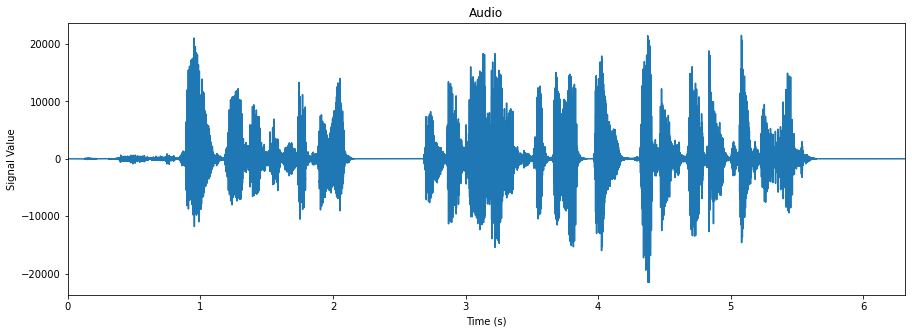

In [ ]:
#plot the .wav
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

##record mic

In [ ]:
%%capture
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

In [ ]:
# all imports
import IPython
import numpy as np
from io import BytesIO
from base64 import b64decode
from google.colab import output
import matplotlib.pyplot as plt
from IPython.display import Javascript

In [ ]:
#code for recording audio in colab
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=5):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

audio_bytes = record(5)

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [ ]:
#create a .wav file
with open('myfile.wav', mode='bx') as f:
    f.write(audio_bytes)

#converting the file into the RIFF format
!ffmpeg -i myfile.wav -acodec pcm_s16le -ac 1 -ar 16000 out.wav

IPython.display.Audio('/content/myfile.wav')

In [ ]:
obj = wave.open('/content/out.wav', 'rb')

sample_feq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / sample_feq

print(t_audio)

#converting a .wav into an array
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

#time used for plotting the x axis
times = np.linspace(0, t_audio, num=n_samples)
print(len(signal_array), len(times))

5.94
95040 95040


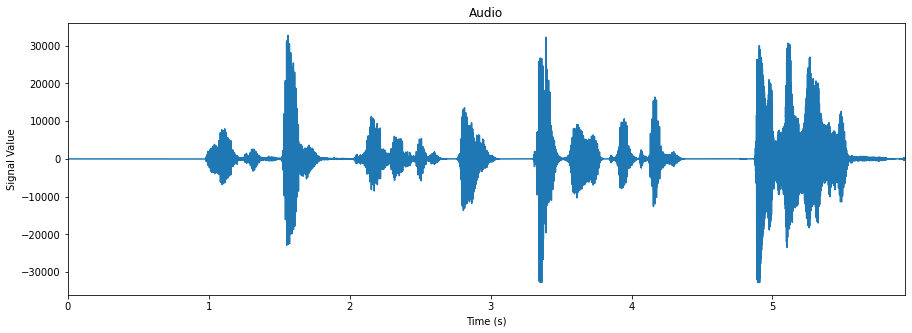

In [ ]:
#plot the .wav
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title('Audio')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

##load mp3 file

In [2]:
%%capture
!pip install ffmpeg
!pip install pydub

!gdown 1DWtj99yt7VigV7ewLaemQV5gJ8kT0wyE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=ff622ec5a38bb9a3dcec79c910b6df29bf6bb58fae7dd7f78a2306f85af8abfe
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [5]:
from pydub import AudioSegment

audio = AudioSegment.from_wav('/content/record.wav')

#increase volume by 6 dB
audio = audio+6

audio = audio * 2 

audio = audio.fade_in(2000)

audio.export('mashup.mp3', format='mp3')

audio2 = AudioSegment.from_mp3('mashup.mp3')

print("done")

done


#audio recognition with API
https://youtu.be/mYUyaKmvu6Y?t=1782

In [8]:
%%capture
!gdown 1DWtj99yt7VigV7ewLaemQV5gJ8kT0wyE

In [10]:
import IPython
IPython.display.Audio('/content/record.wav')

In [98]:
#api_secrets
API_KEY_ASSEMBLYAI = '746b98cc382f44eab33f8e608a07e2d9'

#upload
import requests
import sys
import time
import json

upload_endpoint = 'https://api.assemblyai.com/v2/upload'
transcript_endpoint = "https://api.assemblyai.com/v2/transcript"
headers = {'authorization': API_KEY_ASSEMBLYAI}

filename = '/content/record.wav'


#upload wav file
def upload(filename):
  def read_file(filename, chunk_size=5242880):
      with open(filename, 'rb') as _file:
          while True:
              data = _file.read(chunk_size)
              if not data:
                  break
              yield data

  upload_response = requests.post(upload_endpoint,
                          headers=headers,
                          data=read_file(filename))

  # print(response.json())

  #keep link in a param 
  audio_url = upload_response.json()['upload_url']

  return audio_url

In [99]:
#transcribe
def transcribe(audio_url, sentiment_analysis):
  transcript_request = { 
      "audio_url": audio_url, 
      "sentiment_analysis": sentiment_analysis
      }
  transcript_response = requests.post(transcript_endpoint, json=transcript_request, headers=headers)
  # print(response.json())
  job_id = transcript_response.json()['id']
  return job_id

In [100]:
#poll 
def poll(transcript_id):
  polling_endpoint = transcript_endpoint+'/'+transcript_id
  polling_response = requests.get(polling_endpoint, headers=headers)
  return polling_response.json()

def get_transaction_result_url(audio_url, sentiment_analysis):
  transcript_id = transcribe(audio_url, sentiment_analysis)
  while True:
    data = poll(transcript_id)
    if data['status'] == 'completed':
      return data, None
    elif data['status'] == 'error':
      return data, data['error']

    sec = 15
    print(f'Waiting {sec} seconds...')
    time.sleep(sec)

In [101]:
#save transcript
def save_transcript(audio_url, title, sentiment_analysis=False):
  data, error = get_transaction_result_url(audio_url, sentiment_analysis)
  if data:
    text_filename = title+'.txt'
    #save all transcript in a txt file
    with open(text_filename, "w") as f:
      f.write(data['text'])

    if sentiment_analysis:
      sentiment_filename = title+'_sentiments.json'
      #save text and sentiment data in json file
      with open(sentiment_filename, "w") as f:
        sentiments = data['sentiment_analysis_results']
        json.dump(sentiments, f, indent=4)
    print('Transcription saved :)', data['text'])
  elif error:
    print("Error :", error)

In [65]:
#run all above functions in a row

filename = '/content/record.wav'

audio_url = upload(filename)
save_transcript(audio_url)

Waiting 15 seconds...
Transcription saved :) Hi. My name is Saturood. I'm the AI developer for this AI tutorial.


#extract info from YT & sentiment analysis

In [ ]:
#yt_extractor
%%capture
!pip install youtube-dl

import youtube_dl

In [102]:
ydl = youtube_dl.YoutubeDL()

#get infos from YT videos
def get_video_infos(url):
  with ydl:
    result = ydl.extract_info(
        url, 
        download=False
    )

  if "entries" in result:
    return result['entries'][0]
  return result

#get the audio file from the YT url.
def get_audio_url(video_info):
  for f in video_info['formats']:
    #get the audio file
    if f['ext'] == "m4a":
      return f['url']

if __name__ == "__main__":
  video_info = get_video_infos("https://www.youtube.com/watch?v=e-kSGNzu0hM")
  audio_url = get_audio_url(video_info)
  print(audio_url)

[youtube] e-kSGNzu0hM: Downloading webpage
https://rr6---sn-qxo7rn7e.googlevideo.com/videoplayback?expire=1660654875&ei=u0D7YqDcIcODsfIP4a666AU&ip=34.82.196.101&id=o-AKNItIneOICaYfJfYfl5FvALl-qFfNnGfSTditIlxbJE&itag=140&source=youtube&requiressl=yes&mh=j-&mm=31%2C26&mn=sn-qxo7rn7e%2Csn-5goeen7r&ms=au%2Conr&mv=m&mvi=6&pl=20&spc=lT-KhvkwhHjKFZ_fbb6_Jfmkga3w1i8&vprv=1&mime=audio%2Fmp4&ns=GsyBq35sFZnvLzP2J7K1v1sH&gir=yes&clen=6429687&dur=397.246&lmt=1655864023403212&mt=1660632783&fvip=1&keepalive=yes&fexp=24001373%2C24007246&c=WEB&rbqsm=fr&txp=4532434&n=YBojdZMBZymf-bLDX&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Cmime%2Cns%2Cgir%2Cclen%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAKutaxNSntnG52o8V766DM9DghBs4lu4zz5pM55SOd5JAiEAs4Bn46Wkqk0yvjtFcgdxtVznOZf474VUSUJ8B8E8txk%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl&lsig=AG3C_xAwRAIgK1ztdJZvwUt676ZVZdSGv_BLHphccaHLczbqpvCXcfwCICCNC4bHmTPdYyVLyPWq9LCLZ534dF-Ia4lWf86wFNTq


In [106]:
#main
import json
## used function when used different py files in a laptop.
# from api import save_transcript
# from yt_extractor import get_audio_url, get_video_infos

if '/content/data':
  !mkdir data
else:
  continue

#get
def save_video_sentiments(url):
  video_infos = get_video_infos(url)
  audio_url = get_audio_url(video_infos)
  title = video_infos['title'].strip().replace(' ', "_")
  title = '/content/data/' + title
  save_transcript(audio_url, title, sentiment_anaflysis=True)

if __name__ == "__main__":
  # #download transcript and sentiment in json and txt files
  # save_video_sentiments('https://www.youtube.com/watch?v=e-kSGNzu0hM')

  with open('/content/data/iPhone_13_Review:_Pros_and_Cons_sentiments.json', 'r') as f:
    data = json.load(f)

  positives = []
  negatives = []
  neutrals = []
  for result in data:
    text = result['text']
    if result['sentiment'] == "POSITIVE":
      positives.append(text)
    elif result['sentiment'] == 'NEGATIVE':
      negatives.append(text)
    else:
      neutrals.append(text)

n_pos = len(positives)
n_neg = len(negatives)
n_neut = len(neutrals)

print("Num positives: ", n_pos)
print("Num negatives: ", n_neg)
print("Num netrals: ", n_neut)

r = n_pos/ (n_pos + n_neg)
print(f"Positive ratio: {r:.3f}")

mkdir: cannot create directory ‘data’: File exists
Num positives:  39
Num negatives:  6
Num netrals:  18
Positive ratio: 0.867
